<a href="https://colab.research.google.com/github/zberis/DSPS_ZBeris/blob/main/HW9/homework9ZoeBeris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import sklearn.cluster
from sklearn import mixture
from scipy.cluster.vq import kmeans2

In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jainaru/world-happiness-report-2024-yearly-updated")

print("Path to dataset files:", path)

hapiness = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv", encoding = "latin-1")


Using Colab cache for faster access to the 'world-happiness-report-2024-yearly-updated' dataset.
Path to dataset files: /kaggle/input/world-happiness-report-2024-yearly-updated


In [35]:
hapiness = hapiness.dropna()

In [36]:
hapiness.insert(3, "Ladder Score Minmax", (hapiness["Ladder score"]-hapiness["Ladder score"].min())/ (hapiness["Ladder score"].max()-hapiness["Ladder score"].min()), True)
hapiness.insert(5, "upperwhisker Minmax", (hapiness["upperwhisker"] - hapiness["upperwhisker"].min()) / (hapiness["upperwhisker"].max() - hapiness["upperwhisker"].min()), True )
hapiness.insert(7, "lowerwhisker Minmax", (hapiness["lowerwhisker"] - hapiness["lowerwhisker"].min()) / (hapiness["lowerwhisker"].max() - hapiness["lowerwhisker"].min()), True )
hapiness.insert(9, "Log GDP per capita Minmax", (hapiness["Log GDP per capita"] - hapiness["Log GDP per capita"].min()) / (hapiness["Log GDP per capita"].max() - hapiness["Log GDP per capita"].min()), True )
hapiness.insert(11, "Social support Minmax", (hapiness["Social support"] - hapiness["Social support"].min()) / (hapiness["Social support"].max() - hapiness["Social support"].min()), True )
hapiness.insert(13, "Healthy life expectancy Minmax", (hapiness["Healthy life expectancy"] - hapiness["Healthy life expectancy"].min()) / (hapiness["Healthy life expectancy"].max() - hapiness["Healthy life expectancy"].min()), True )
hapiness.insert(15, "Freedom to make life choices Minmax", (hapiness["Freedom to make life choices"] - hapiness["Freedom to make life choices"].min()) / (hapiness["Freedom to make life choices"].max() - hapiness["Freedom to make life choices"].min()), True)
hapiness.insert(17, "Generosity Minmax", (hapiness["Generosity"] - hapiness["Generosity"].min()) / (hapiness["Generosity"].max() - hapiness["Generosity"].min()), True)
hapiness.insert(19, "Perceptions of corruption Minmax", (hapiness["Perceptions of corruption"] - hapiness["Perceptions of corruption"].min()) / (hapiness["Perceptions of corruption"].max() - hapiness["Perceptions of corruption"].min()), True)
hapiness.insert(21, "Dystopia + residual Minmax", (hapiness["Dystopia + residual"] - hapiness["Dystopia + residual"].min()) / (hapiness["Dystopia + residual"].max() - hapiness["Dystopia + residual"].min()), True)

hapiness.insert(4, "Ladder Score Standardized", (hapiness["Ladder score"] - hapiness["Ladder score"].mean()) / hapiness["Ladder score"].std(), True)
hapiness.insert(7, "upperwhisker Standardized", (hapiness["upperwhisker"] - hapiness["upperwhisker"].mean()) / hapiness["upperwhisker"].std(), True )
hapiness.insert(10, "lowerwhisker Standardized", (hapiness["lowerwhisker"] - hapiness["lowerwhisker"].mean()) / hapiness["lowerwhisker"].std(), True )
hapiness.insert(13, "Log GDP per capita Standardized", (hapiness["Log GDP per capita"] - hapiness["Log GDP per capita"].mean()) / hapiness["Log GDP per capita"].std(), True )
hapiness.insert(16, "Social support Standardized", (hapiness["Social support"] - hapiness["Social support"].mean()) / hapiness["Social support"].std(), True )
hapiness.insert(19, "Healthy life expectancy Standardized", (hapiness["Healthy life expectancy"] - hapiness["Healthy life expectancy"].mean()) / hapiness["Healthy life expectancy"].std(), True )
hapiness.insert(22, "Freedom to make life choices Standardized", (hapiness["Freedom to make life choices"] - hapiness["Freedom to make life choices"].mean()) / hapiness["Freedom to make life choices"].std(), True)
hapiness.insert(25, "Generosity Standardized", (hapiness["Generosity"] - hapiness["Generosity"].mean()) / hapiness["Generosity"].std(), True)
hapiness.insert(28, "Perceptions of corruption Standardized", (hapiness["Perceptions of corruption"] - hapiness["Perceptions of corruption"].mean()) / hapiness["Perceptions of corruption"].std(), True)
hapiness.insert(31, "Dystopia + residual Standardized", (hapiness["Dystopia + residual"] - hapiness["Dystopia + residual"].mean()) / hapiness["Dystopia + residual"].std(), True)


In [37]:
np.random.seed(484)
labels={}
col = [
    "Social support Minmax",
    "Healthy life expectancy Minmax",
    "Freedom to make life choices Minmax",
    "Generosity Minmax",
    "Perceptions of corruption Minmax",
    "Dystopia + residual Minmax"]
kall = [[] for y in range(6)]
kall[0] = hapiness[col[0]]
kall[1] = hapiness[col[1]]
kall[2] = hapiness[col[2]]
kall[3] = hapiness[col[3]]
kall[4] = hapiness[col[4]]
kall[5] = hapiness[col[5]]
kall = np.array(kall)
kall = kall.T
#find the clusters for every N
clf = sklearn.cluster.KMeans(3, n_init='auto')
#get the cluster label for every point
labels = clf.fit_predict(kall) #.reshape(100,2)




In [38]:
for i in [0,1,2]:
  mean = 0
  count = 0
  cluster_count = 0
  for label in labels:
    if label == i:
      mean += hapiness["Ladder score"].iloc[count]
      cluster_count += 1
    count += 1
  mean = mean/cluster_count
  print(mean, cluster_count)


6.905045454545455 22
4.244041666666667 48
5.981428571428572 70


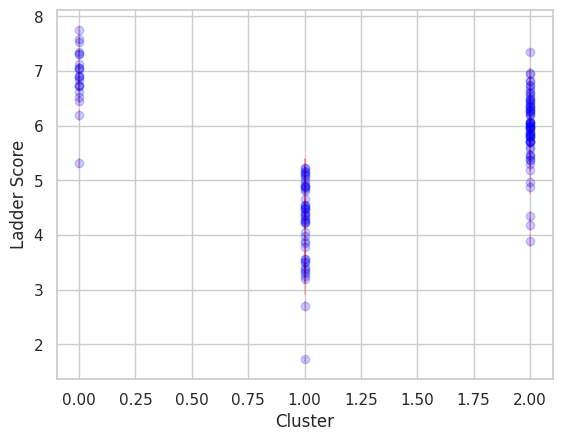

In [48]:
sns.set(style="whitegrid", context="notebook")
plt.errorbar(labels, hapiness["Ladder score"], yerr=[hapiness["upperwhisker"]-hapiness["Ladder score"],hapiness["Ladder score"]-hapiness["lowerwhisker"]], fmt='o', color='blue', alpha=0.2, ecolor="red")
plt.xlabel("Cluster")
plt.ylabel("Ladder Score")
plt.show()


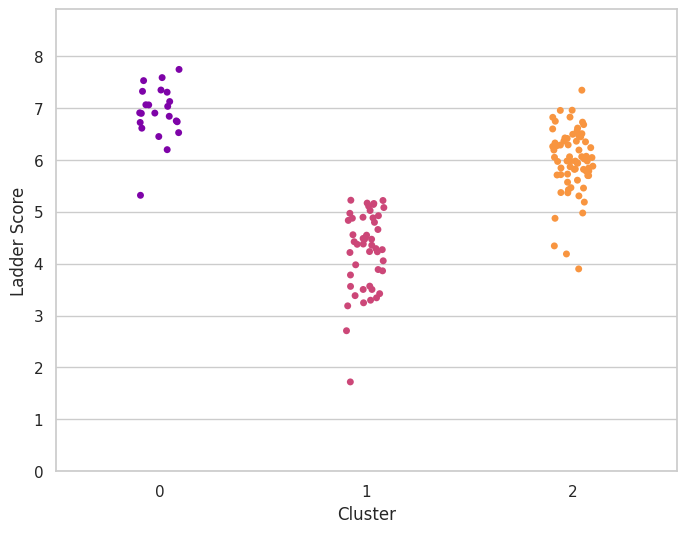

In [47]:
palette = sns.color_palette("plasma", n_colors=3)
sns.set(style="whitegrid", context="notebook")
fig = plt.figure(figsize=(8, 6))
z =sns.stripplot(x=labels, y=hapiness["Ladder score"], jitter=True, palette=palette, hue = labels, legend = False)
#plt.errorbar(labels, hapiness["Ladder score"], yerr=[hapiness["upperwhisker"]-hapiness["Ladder score"],hapiness["Ladder score"]-hapiness["lowerwhisker"]], fmt='o', color='blue', alpha=0.2, ecolor="red")
plt.xlabel("Cluster")
plt.ylim(0,8.9)
plt.ylabel("Ladder Score")
plt.show()
